In [1]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
file_url = "A:/Programming/Python/NLP/Data files/EDA Session 3.1/flavors_of_cacao.csv"
df = pd.read_csv(file_url)

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
for col in df.columns:
    print(col+"\n")

Company 
(Maker-if known)

Specific Bean Origin
or Bar Name

REF

Review
Date

Cocoa
Percent

Company
Location

Rating

Bean
Type

Broad Bean
Origin



In [5]:
df.tail(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [6]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [7]:
df.shape

(1795, 9)

In [8]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [9]:
for col in df.columns:
    n_unique_values = df[col].nunique()
    print("col: %s has %d unique values" % (col, n_unique_values))
    print(df[col].value_counts(dropna=False).index)

col: Company 
(Maker-if known) has 416 unique values
Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'A. Morin', 'Arete', 'Guittard',
       'Domori', 'Valrhona', 'Hotel Chocolat (Coppeneur)',
       ...
       'Mayacama', 'Majani', 'Malagos', 'Malmo', 'Manifesto Cacao',
       'Chocablog', 'Marigold's Finest', 'Chloe Chocolat', 'Chequessett',
       'Ki' Xocolatl'],
      dtype='object', name='Company \n(Maker-if known)', length=416)
col: Specific Bean Origin
or Bar Name has 1039 unique values
Index(['Madagascar', 'Peru', 'Ecuador', 'Dominican Republic', 'Venezuela',
       'Chuao', 'Sambirano', 'Ocumare', 'Ghana', 'Papua New Guinea',
       ...
       'Ghana, #211, MR, MC', 'Jamaica, #209, DR, SC',
       'Conacado, #212, LR, SC', 'Jamaica, #210, DR, MC',
       'Sambirano Valley, #214, LR, MC', 'Conacado, #213, DR, -C',
       'Sambirano Valley, #215, MR, MC', 'Chuao, #218, MR, MC',
       'Chuao, #217, DR, MC', 'Brazil, Mitzi Blue'],
      dtype='object', name='Specific Bean Origin\no

In [10]:
df.describe(include='all')

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
count,1795,1795,1795.000000,1795.000000,1795,1795,1795.000000,1794,1794
unique,416,1039,NaN,NaN,45,60,NaN,41,100
top,Soma,Madagascar,NaN,NaN,70%,U.S.A.,NaN,,Venezuela
freq,47,57,NaN,NaN,672,764,NaN,887,214
mean,NaN,NaN,1035.904735,2012.325348,NaN,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,NaN,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,NaN,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,NaN,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,NaN,NaN,3.500000,NaN,NaN


In [11]:
for col in df.columns:
    print(df[col].value_counts())
    print("\n")

Company \n(Maker-if known)
Soma                 47
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: count, Length: 416, dtype: int64


Specific Bean Origin\nor Bar Name
Madagascar                        57
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: count, Length: 1039, dtype: int64


REF
414    10
404     9
24      9
387     9
32      8
       ..
579     1
855     1
597     1
849     1
202     1
Name: count, Length: 440, dtype: int64


Review\nDate
2015    285
2014 

In [12]:
df.isnull().any(axis=0)

Company \n(Maker-if known)           False
Specific Bean Origin\nor Bar Name    False
REF                                  False
Review\nDate                         False
Cocoa\nPercent                       False
Company\nLocation                    False
Rating                               False
Bean\nType                            True
Broad Bean\nOrigin                    True
dtype: bool

In [13]:
for col in df.columns:
    condition = np.logical_or(df[col].isna(), df[col] is None)
    indexes = df[condition][col].index
    if len(indexes) > 0:
        print(f"%s {indexes}"%col)

Bean
Type Index([1544], dtype='int64')
Broad Bean
Origin Index([1072], dtype='int64')


In [14]:
print("Total number of missing values: %d"%(df[col].isnull().sum().sum()))

Total number of missing values: 1


In [15]:
print("Total number of columns with all values null values: %d"%(df[col].isna().all(axis=0)))
print("Total number of columns with any row having null value: %d"%(df[col].isna().any(axis=0)))

Total number of columns with all values null values: 0
Total number of columns with any row having null value: 1


In [16]:
print("Total number of rows with all values null values: ",df.isnull().all(axis=1).sum())

Total number of rows with all values null values:  0


In [17]:
print("Total number of rows with any values null values: ",df.isnull().any(axis=1).sum())

Total number of rows with any values null values:  2


In [18]:
total_null = df.isnull().sum().sort_values(ascending=False)
total = df.count().sort_values(ascending=False)
percent = (df.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total_null, total, percent], axis=1, keys=["Null values", "Total", "percentage"])
print(missing_data)

                                   Null values  Total  percentage
Bean\nType                                   1   1794     0.05571
Broad Bean\nOrigin                           1   1794     0.05571
Company \n(Maker-if known)                   0   1795     0.00000
Specific Bean Origin\nor Bar Name            0   1795     0.00000
REF                                          0   1795     0.00000
Review\nDate                                 0   1795     0.00000
Cocoa\nPercent                               0   1795     0.00000
Company\nLocation                            0   1795     0.00000
Rating                                       0   1795     0.00000


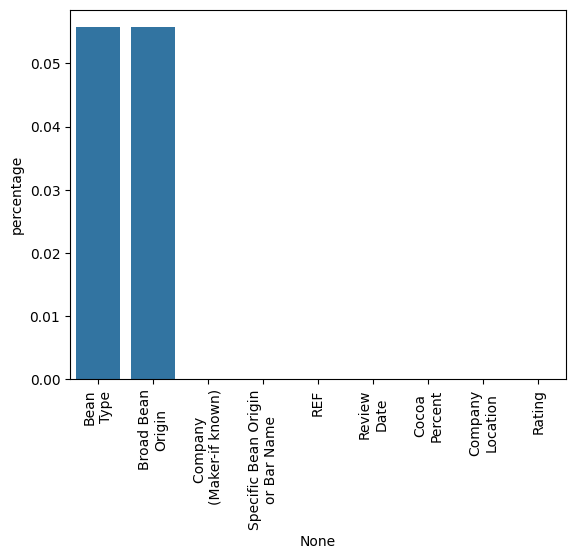

In [19]:
sb.barplot(x=missing_data.index, y=missing_data['percentage'])
plt.xticks(rotation=90)
plt.show()

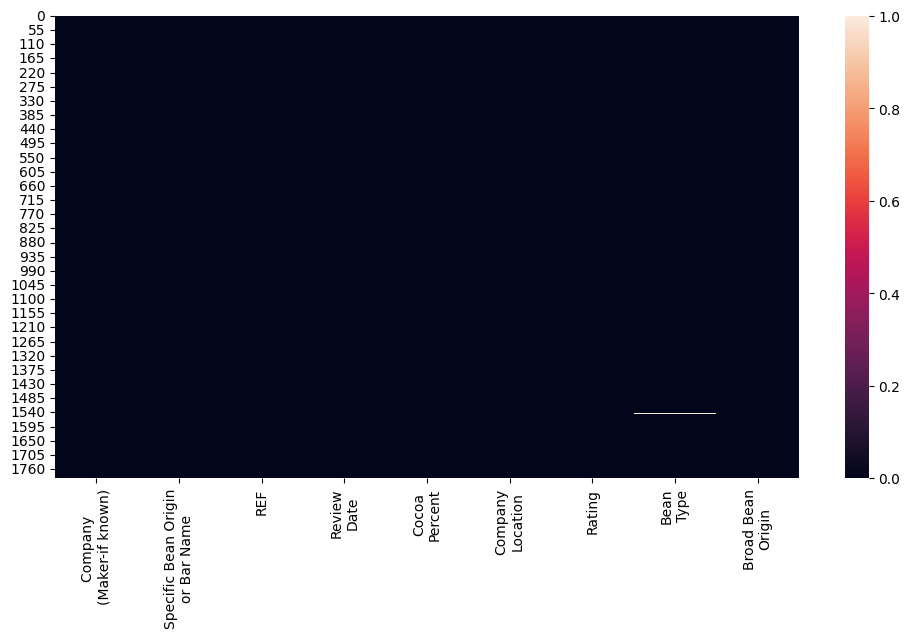

In [20]:
plt.figure(figsize=(12, 6))
sb.heatmap(df.isnull())
plt.show()

In [22]:
for i in range(len(df.columns)):
    if i in [2, 3, 6]:
        df[df.columns[i]].replace(".", np.nan, inplace=True)

In [23]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [27]:
df['Rating'] = df['Rating'].apply(np.int64)

In [28]:
df.dtypes

Company \n(Maker-if known)           object
Specific Bean Origin\nor Bar Name    object
REF                                   int64
Review\nDate                          int64
Cocoa\nPercent                       object
Company\nLocation                    object
Rating                                int64
Bean\nType                           object
Broad Bean\nOrigin                   object
dtype: object

In [29]:
df.to_csv("A:/Programming/Python/NLP/Data files/EDA Session 3.1/flavors_of_cacao_data_preprocessing1.csv")